## Modules Import

In [4]:
import sys
import os

# Get project root (one level above 'notebooks')
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

if project_root not in sys.path:
    sys.path.append(project_root)

import lightning as pl
from pathlib import Path
from data.loaders import get_dataset, get_dataloader
from utils.config_loader import load_hydra_config
from models.light.model import FastFlowerClassifier
from utils.utils import get_pretrained_transforms
from visualization.plots import (
    display_sample_images,
    plot_batch_class_distribution,
    plot_metric
)


## Configuration Paths

In [5]:
data_config_path = Path("../configs/data")
model_config_path = Path("../configs/model/light")

## Data & Model configurations with hydra

In [6]:
data_configs = load_hydra_config(data_config_path, "data_configs.yaml")
model_configs = load_hydra_config(model_config_path, "model_configs.yaml")

## Dataset Transformers

In [7]:
train_transforms = get_pretrained_transforms()

## Small subset of the data

In [8]:
root_dir = project_root / Path(data_configs.dataset.processed_dir)

In [9]:
mode = 'train'

In [10]:
dataset = get_dataset(
    root_dir=root_dir,
    mode=mode,
    transforms=train_transforms,
    target_transforms=None,
    num_instances=20
)

## Dataloader

In [11]:
data_loader = get_dataloader(dataset=dataset, mode=mode, cfg=data_configs)

## Data samples plot

2025-03-27 02:06:15,257 - WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].
2025-03-27 02:06:15,260 - WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
2025-03-27 02:06:15,264 - WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781512..2.2489083].


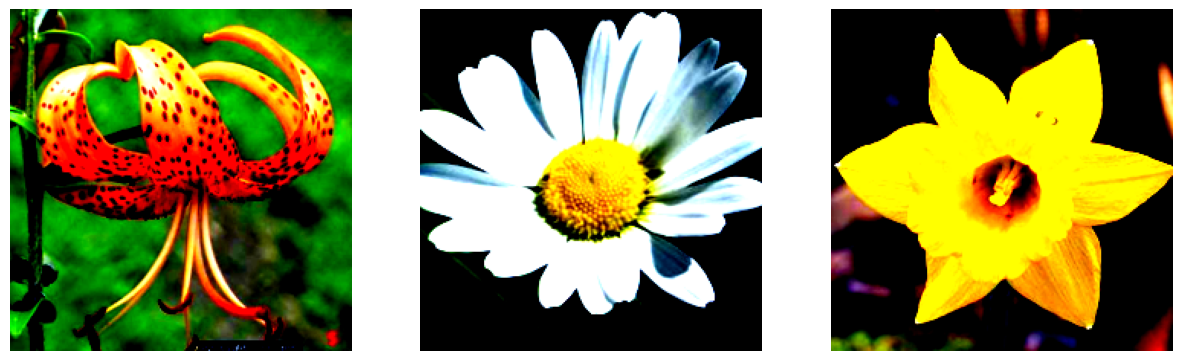

In [12]:
display_sample_images(dataloader=data_loader, num_images=3)

## Class distribution over selected batch

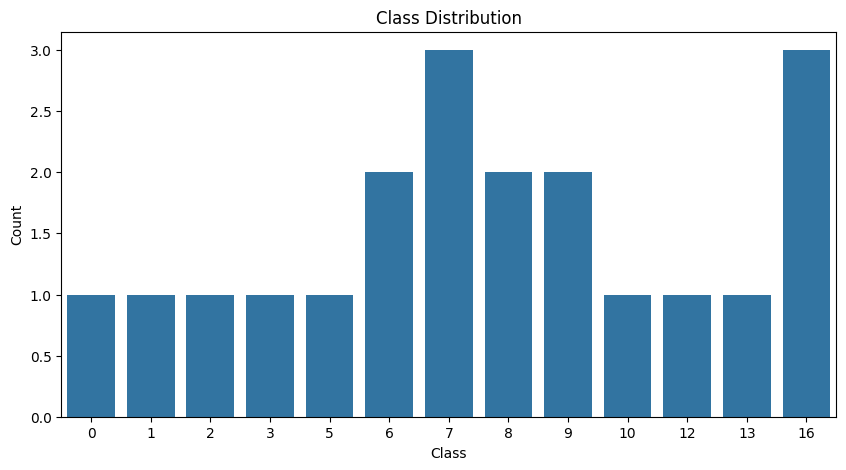

In [13]:
plot_batch_class_distribution(data_loader)

## Initialize light classifier

In [14]:
light_classifier = FastFlowerClassifier(model_configs)

## Lightning Trainer

In [15]:
trainer = pl.Trainer(max_epochs=model_configs.epochs, devices=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


## Fit the classifier over the small subset

In [16]:
trainer.fit(light_classifier, train_dataloaders=data_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | classifier | Sequential       | 1.0 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
93.9 K    Trainable params
927 K     Non-trainable params
1.0 M     Total params
4.084     Total estimated model params size (MB)
215       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=32` reached.


## Loss & accuracy

In [17]:
train_loss = [output["loss"] for output in light_classifier.epoch_outputs["train"]]
train_acc = [output["accuracy"] * 100 for output in light_classifier.epoch_outputs["train"]]

## Loss plot

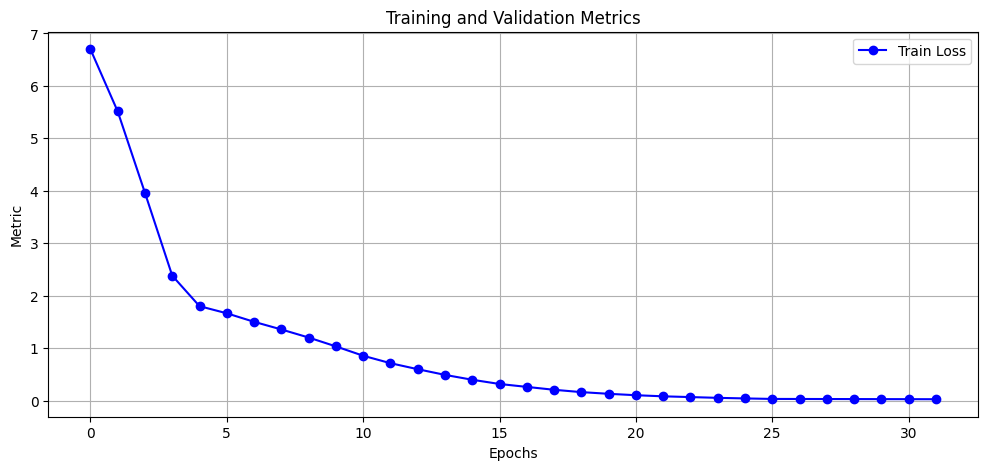

In [18]:
plot_metric(train_loss=train_loss)

## Accuracy plot

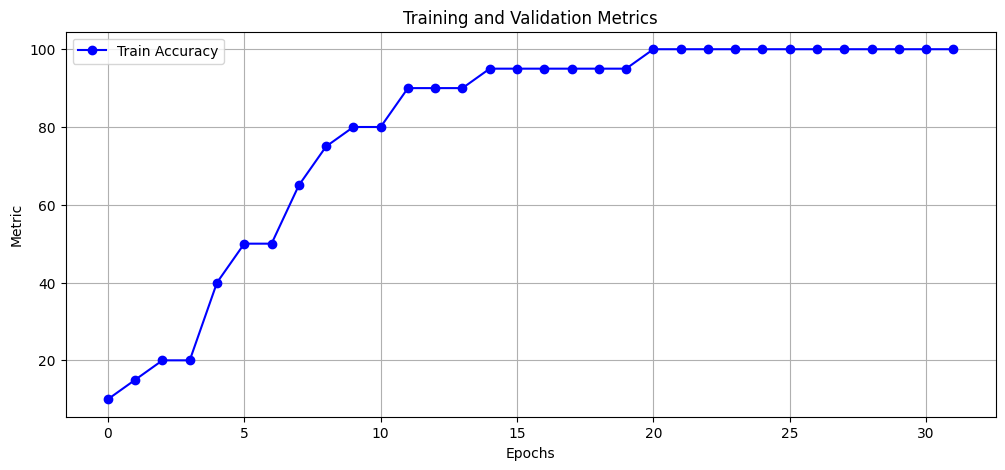

In [19]:
plot_metric(train_acc=train_acc)